In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f10336d31d9cd7f238af90c297b605f


In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform (low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform (low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Create an empty list to hold the weather data. 
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create Counters
record_count = 1
set_count = 1 

Beginning Data Retrieval
------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kieta
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | nhulunbuy
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | whitehaven
Processing Record 6 of Set 1 | granada
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | kutum
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | kuche
City not found. Skipping...
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | hobart
Processin

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kieta,96,PG,2021-04-23 23:59:56,68,-6.2167,155.6333,83.39,3.00
1,Saint George,1,US,2021-04-23 23:55:45,8,37.1041,-113.5841,81.00,16.11
2,Nhulunbuy,89,AU,2021-04-23 23:59:56,45,-12.2333,136.7667,87.80,17.27
3,Qaanaaq,100,GL,2021-04-23 23:59:57,84,77.4840,-69.3632,18.12,5.73
4,Whitehaven,100,GB,2021-04-23 23:59:57,45,54.5490,-3.5841,52.00,4.92
5,Granada,100,ES,2021-04-23 23:59:57,75,37.2500,-3.2500,57.00,1.99
6,Barrow,1,US,2021-04-23 23:59:57,74,71.2906,-156.7887,26.60,6.91
7,Port Hardy,90,CA,2021-04-23 23:55:52,66,50.6996,-127.4199,53.60,6.91
8,Kapaa,75,US,2021-04-23 23:59:58,61,22.0752,-159.3190,80.60,14.97
9,Bredasdorp,95,ZA,2021-04-23 23:59:58,93,-34.5322,20.0403,50.00,4.61


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_new = city_data_df[new_column_order]
city_data_df_new.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kieta,PG,2021-04-23 23:59:56,-6.2167,155.6333,83.39,68,96,3.00
1,Saint George,US,2021-04-23 23:55:45,37.1041,-113.5841,81.00,8,1,16.11
2,Nhulunbuy,AU,2021-04-23 23:59:56,-12.2333,136.7667,87.80,45,89,17.27
3,Qaanaaq,GL,2021-04-23 23:59:57,77.4840,-69.3632,18.12,84,100,5.73
4,Whitehaven,GB,2021-04-23 23:59:57,54.5490,-3.5841,52.00,45,100,4.92
5,Granada,ES,2021-04-23 23:59:57,37.2500,-3.2500,57.00,75,100,1.99
6,Barrow,US,2021-04-23 23:59:57,71.2906,-156.7887,26.60,74,1,6.91
7,Port Hardy,CA,2021-04-23 23:55:52,50.6996,-127.4199,53.60,66,90,6.91
8,Kapaa,US,2021-04-23 23:59:58,22.0752,-159.3190,80.60,61,75,14.97
9,Bredasdorp,ZA,2021-04-23 23:59:58,-34.5322,20.0403,50.00,93,95,4.61


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

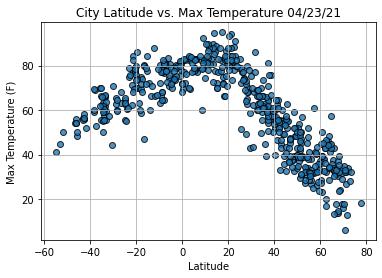

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

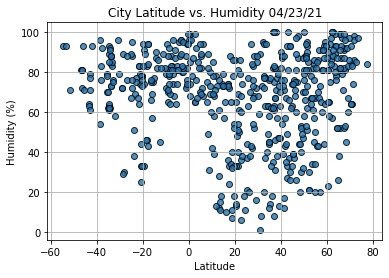

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

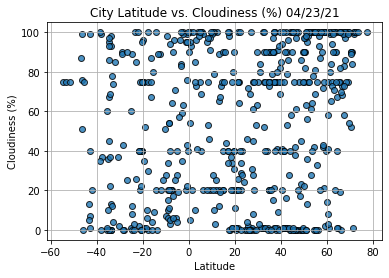

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()